In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3457,3458,55,31,91,94110,2,2.8,1,0,0,0,0,1,0
2967,2968,38,14,95,94109,2,1.9,1,0,0,0,0,1,1
1909,1910,56,30,101,90048,3,1.7,2,0,0,0,0,0,1
4710,4711,41,17,71,92182,3,0.3,3,0,0,0,0,0,1
2620,2621,48,22,152,95616,1,0.0,1,0,0,0,0,0,0
1275,1276,27,2,92,95616,2,3.1,1,178,0,0,0,1,0
544,545,35,10,164,91614,2,7.8,1,0,0,0,0,1,0
4569,4570,47,21,49,92152,3,2.2,2,0,0,1,0,0,0
4323,4324,52,28,31,92008,4,0.9,2,151,0,1,0,1,0
2063,2064,56,30,32,94080,2,0.4,3,0,0,0,0,1,0


In [3]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [6]:
bank_df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


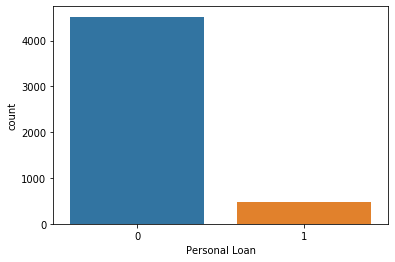

In [7]:
sns.countplot(bank_df['Personal Loan'])

In [8]:
bank_df.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [9]:
bank_df.sample(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2159,61,35,99,1,4.8,3,255,1,0,0,0,1
3483,60,36,195,1,4.7,1,0,0,0,0,1,0
2386,31,5,72,3,1.6,1,0,0,0,0,1,0
239,28,3,52,4,1.7,2,0,0,0,0,0,0
135,58,33,45,4,2.1,1,0,0,0,0,1,1
4391,46,22,113,2,3.3,1,0,0,0,0,0,1
4422,57,31,164,2,3.8,3,422,1,0,1,1,1
2750,57,33,24,1,0.1,2,0,0,0,0,0,0
677,46,21,204,2,2.8,1,0,0,0,0,1,0
3997,62,38,80,4,1.7,2,0,0,0,0,0,0


In [10]:
#Personal Loan is highly correlated to Income, CCAvg and CD Account features

In [11]:
bank_df_labels = bank_df['Personal Loan']

In [12]:
# store the labels data into a separate np array

y = np.array(bank_df_labels)
y.shape

(5000,)

In [13]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bank_df_z = bank_df.apply(zscore)  # convert all attributes to Z scale 

bank_df_z.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,-5.565326e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,3.068659e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [14]:
X = bank_df_z.drop("Personal Loan", axis=1)

In [15]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

/Users/karthik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_predict = model.predict(X_test)

In [19]:
model_score = model.score(X_test, y_test)
model_score

0.948

In [20]:
y_predict = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[1335   16]
 [  62   87]]


In [21]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

In [22]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [23]:
NNH.score(X_test, y_test)

0.954

In [24]:
y_predict = NNH.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[1340   11]
 [  58   91]]


In [25]:
GNB = GaussianNB()

In [26]:
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
GNB.score(X_test, y_test)

0.8746666666666667

In [28]:
y_predict = GNB.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[1228  123]
 [  65   84]]


In [29]:
#As the data is nt parametric, the KNN model gave a better accuracy than Logistics and Naive Bayes classification models.